TypeError: 'int' object is not iterable

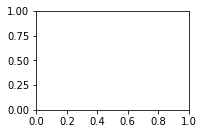

In [2]:
# SchrodingersEQ.py
# Author: Michael Crisp
# Date: 1 December 2018
#
# Description: A few straightforward solutions to the S.E. under classic conditions. 

import numpy as np
import matplotlib.pyplot as plt

steps = 10000
hbar = 1
m = 1

#Mr. Laning assisted me a lot in understanding how to attempt this. I know our code shares some qualities. This method is his Verbatim. 
def Solver(xmin, xmax, pot):
    
    x = np.linspace(xmin, xmax, steps)
    dx = x[1] - x[0]
    V_0 = np.fromfunction(np.vectorize(pot), steps, dx = dx, xmin = xmin, xmax = xmax)
    A_0 = -(hbar**2)/(2*m)*(1/dx**2)*(np.diag(np.ones(steps-1), -1) - 2*np.diag(np.ones(steps - 1), 1)) + np.diag(V)
    
    E = np.linalg.eigh(A_0)
    transposePsi = np.linalg.eigh(A_0)
    psi = np.transpose(transposePsi)
    return E, psi

plotrange = 5

#General plot figure.
plt.figure()

#Setting up superimposed visuals
#ISW
plt.subplot(2, 2, 1)
q = Solver(0, 1, lambda x, xmin, xmax, dx: 0)

for i in range(plotrange):
    plt.plot(-q[i])
plt.legend()

#ISW w/ wall
#all that changes is the differential
plt.subplot(2, 2, 2)
q = Solver(0, 1, lambda x, xmin, xmax, dx: 10**3 if 1200 <= x < 3000 else 0)

for i in range(plotrange):
    plt.plot(-q[i])
plt.legend()

#SHO
plt.subplot(2, 2, 3)
q = Solver(-0.5, 0.5, lambda x, xmin, xmax, dx: 0.001 * (x-steps/2)**2)

for i in range(plotrange):
    plt.plot(q[i])
plt.legend()

plt.show()

#And in the end, despite all the work and trying to understand these functions... no clue why it can't iterate. I'm a failure at everything, I swear.